In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [331]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [333]:
cat_veriable = ['gender','age','ever_married','work_type','Residence_type','avg_glucose_level','bmi' ,'smoking_status']
enc = LabelEncoder()
for col in cat_veriable:
    df[col] = enc.fit_transform(df[col])

In [334]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,88,0,1,1,2,1,3850,239,1,1
1,51676,0,82,0,0,1,3,0,3588,418,2,1
2,31112,1,101,0,1,1,2,0,2483,198,2,1
3,60182,0,70,0,0,1,2,1,3385,217,3,1
4,1665,0,100,1,0,1,3,0,3394,113,2,1


In [335]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,0,101,1,0,1,2,1,1360,418,2,0
5106,44873,0,102,0,0,1,3,1,3030,273,2,0
5107,19723,0,56,0,0,1,3,0,1314,179,2,0
5108,37544,1,72,0,0,1,2,0,3363,129,1,0
5109,44679,0,65,0,0,1,0,1,1454,135,0,0


In [336]:
df['id'].unique()

array([ 9046, 51676, 31112, ..., 19723, 37544, 44679], dtype=int64)

In [337]:
x = df.drop('heart_disease',axis=1)
y = df['heart_disease']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [338]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [339]:
pred1 = model1.predict(x_test)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [340]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



AxesSubplot(0.125,0.125;0.62x0.755)


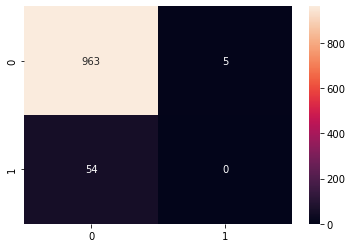

In [341]:
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='0.5g'))

In [342]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [343]:
pred2 = model2.predict(x_test)
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [344]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AxesSubplot(0.125,0.125;0.62x0.755)


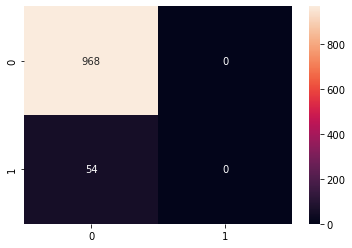

In [345]:
print(sns.heatmap(confusion_matrix(y_test,pred2),annot =True,fmt='0.5g'))

In [346]:
MPLMODEL = MLPClassifier(solver = 'adam',hidden_layer_sizes=(100,),activation='logistic')
MPLMODEL.fit(x_train,y_train)

MLPClassifier(activation='logistic')

In [347]:
mlppred = MPLMODEL.predict(x_test)
mlppred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

AxesSubplot(0.125,0.125;0.62x0.755)


e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


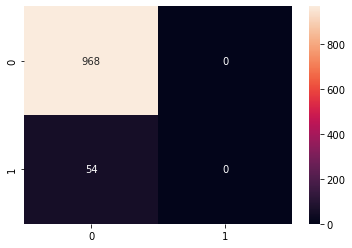

In [348]:
print(classification_report(y_test,mlppred))
print(sns.heatmap(confusion_matrix(y_test,mlppred),annot =True,fmt='0.5g'))